
# Project: Investigate a Dataset - [TMDB movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This is a Data Analysis dataset on information about of over 1,000 movies collected from the movie database from 1960 to 2015. The dataset contains info on variables like popularity, budget, revenue, original_title and so on. 

This project focuses on relationship between different variables per decade rather than year as displayed on the dataset. 

The project also tries to look at the effect of time on movies with regards to popularity and revenue generated. 

 
### Columns Description 

ID                      This shows the ID of each movie

IMDB_ID                This shows the ID assigned to eachmovie by the popular movie body

POPULARITY             The rating of each movie

BUDGET                 The amount of money spent in producing a movie

REVENUE                 The amount of money generated from a movie

ORIGINAL TITLE          The title of the movie 

CAST                    The actors/actresses in the movies

HOMEPAGE                The website page of the movie

DIRECTOR                The director of the movie

TAGLINE                 slogans or catchphrase for the movie

KEYWORDS                Keywords in a movie

OVERVIEW                A simple overview of the movie

RUNTIME                 the duration of the movie in minutes

GENRES                  the category for each movie

PRODUCTION COMPANIES    the company involved in the production of the movie

RELEASE_DATE            The date the movie was released

VOTE_COUNT              the no of vote 

VOTE_AVERAGE            the average no of votes for each movie

RELEASE_YEAR            the year each movie was produced

BUDGET_ADJ              this is the budget figure adjusted to 2010 dollars accounting for inflation

REVENUE_ADJ             This is the revenue figure adjusted to 2010 dollars accounting for inflation

### Question(s) for Analysis
1.What period produced the most movies

2.What period generated the highest average revenue 

3.What period generated the highest average revenue when inflation is factored

4.What period generated the highest average spend on movies 

5.What period had the highest average spend when inflation is factored

6.Is there a correlation between budget and revenue generated for movies

7.what percentage of movies broke even (breaking even in movies means the revenue generated must be at least 3x the  budget)
8.What period is responsible for the highest average popularity rating


In [22]:
# Import libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [23]:
# Load our dataset and take a lok at the data


df = pd.read_csv('MOVIES.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [24]:
# check the size of the dataset
df.shape

(10866, 21)

In [25]:
# also to check the info on the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [26]:
# to check the statistical attributes of our data 

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [27]:
# to check for missing values 
df.isnull().sum()
# we can see that columns like homepage, tagline, keyworkds, production_companies contain a lot of missing values. 
# These columns will be dropped as they are not useful to our analysis.

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [28]:
# check for duplicates. We are going to drop the duplicate 
sum(df.duplicated())

1


### Data Cleaning 

In [29]:
# drop the duplicates

df.drop_duplicates(inplace = True)


In [30]:
# we can check the info of our new data
df.info()
# we can see that our max rows has reduced by 1 from 10866 to 10865

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [31]:
# drop columns not useful to our analysis
df.drop(df.columns[[0,1,7,9,10,11,14]],axis = 1, inplace = True)

In [32]:
# check to see whether the columns have been dropped
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [33]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [34]:
#because columns. cast, director and genres are non-numerical variable and will be useful to our analysis. 
# We are going to fill the missing values with 'Unknown'
df_clean = df.fillna('Unknown')

In [35]:
# We can see that our dataset contains no missing values
df_clean.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [38]:
# we are going to change the release year column from years to periods as shown below
bin_edges = [1960,1969,1979,1989,1999,2015]

In [39]:
bin_names = ['60s','70s','80s','90s','2000s']

In [40]:
df_clean['release_year'] = pd.cut(df_clean['release_year'], bin_edges, labels = bin_names)

In [41]:

df_clean.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2000s,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2000s,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2000s,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2000s,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2000s,1.747999e+08,1.385749e+09


In [42]:
# it is widely believed that for a movie to break even, it must generate a revenue 3x its budget. 
# to introduce a column called breakeven_value, which is revenue/budget
df_clean['breakeven_value'] = df_clean['revenue']/df_clean['budget']

In [43]:
# We can check the dataframe which shows the inclusion of the column 'breakeven_value'
df_clean.head()


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,breakeven_value
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2000s,1.379999e+08,1.392446e+09,10.090192
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2000s,1.379999e+08,3.481613e+08,2.522909
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2000s,1.012000e+08,2.716190e+08,2.683984
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2000s,1.839999e+08,1.902723e+09,10.340891
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2000s,1.747999e+08,1.385749e+09,7.927628


In [44]:
# we will need to rename the column release date to release_period
df_clean.rename(columns={'release_year': 'release_period'}, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1  

1.What period accounted for the most movies produced?




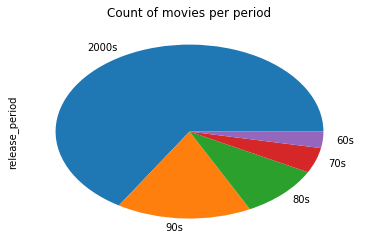

In [59]:
#The answer is the 2000s as evident in the pie chart below 
df_clean.release_period.value_counts().plot(kind = 'pie')
plt.title('Count of movies per period');

### Research Question 2 

What period generated the highest average revenue


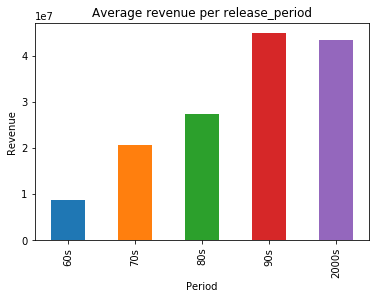

In [60]:
df_clean.groupby('release_period').mean().revenue.plot(kind = 'bar')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.title('Average revenue per release_period');

The bar chart shows that the 90s were responsible for the highest revenue generated for the periods under review

## Reasearch Question 3

 What period generated the highest average revenue when inflation is factored

Text(0.5,1,'Average adjusted revenue per release_period')

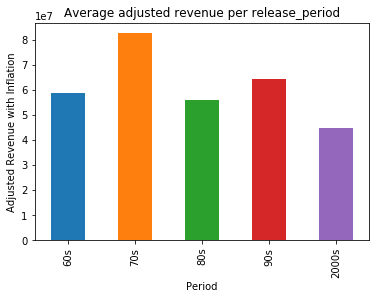

In [61]:
df_clean.groupby('release_period').mean().revenue_adj.plot(kind = 'bar')
plt.xlabel('Period')
plt.ylabel('Adjusted Revenue with Inflation')
plt.title('Average adjusted revenue per release_period')

In terms of monetary value, the 70s is responsible for the highest revenue when inflation is factored. 
Despite not accounting for the highest volume of cash, the 70s revenue was more valuable than any period under review

## Reasearch Question 4

 What period was responsible for the highest average spend per movie
 
 

Text(0.5,1,'Average Budget spend per period')

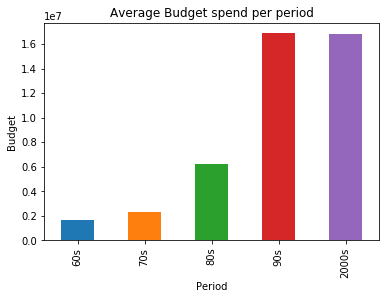

In [62]:
# to check the average amount spent on movies per period
df_clean.groupby('release_period').mean().budget.plot(kind = 'bar')
plt.xlabel('Period')
plt.ylabel('Budget')
plt.title('Average Budget spend per period')

Budget spend per period movement increased over the periods

# Research Question 5

What period had the highest average spend when inflation is factored



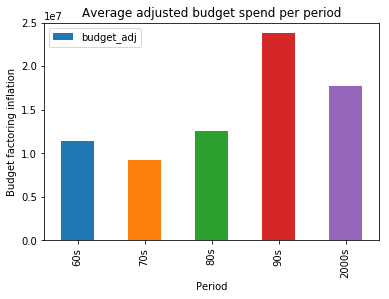

In [58]:
df_clean.groupby('release_period').mean().budget_adj.plot(kind = 'bar')
plt.xlabel('Period')
plt.ylabel('Budget factoring inflation')
plt.title('Average adjusted budget spend per period')
plt.legend()

# Research Question 6

Is there a correlation between budget and revenue generated for movies

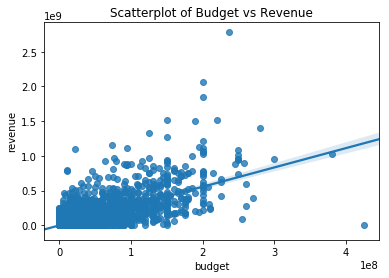

In [63]:
sns.regplot(data = df_clean , x = 'budget', y = 'revenue')
plt.title('Scatterplot of Budget vs Revenue');

There seems to be some sort of correlation especially with movies on the low budget scale. There are outliers especially with the high budget movies not generating the highest revenues.

# Research Question 7

What percentage of movies broke even (breaking even in movies means the revenue generated must be at least 3x the budget)

In [52]:
# To get the percentage of movies that breakeven(i.e where revenue/budget is 3 or more)
df_a = df_clean[df_clean['breakeven_value'] >= 3]
df_b = df_clean[df_clean['breakeven_value'] < 3]

In [55]:
# count of movies with revenue/budget is 3 or more
df_a['breakeven_value'].count()

2400

In [56]:
# to get the percentage over the total distribution
df_a['breakeven_value'].count()/df_clean['breakeven_value'].count() * 100

38.935756002595717

In [ ]:
# The percentage of movies that broke even(i.e make 3x its budget) is around 39%
#This means that about every 4 out of 10 movies break even

# Research Question 8

What period is responsible for the highest average popularity rating

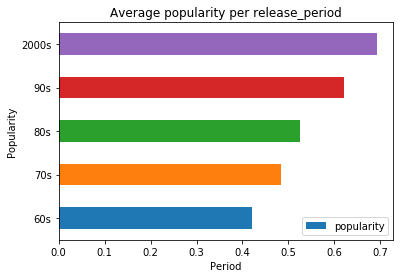

In [64]:
# check the period with the most popular movies
df_clean.groupby('release_period').mean().popularity.plot(kind = 'barh')
plt.xlabel('Period')
plt.ylabel('Popularity')
plt.title('Average popularity per release_period')
plt.legend()



The information above shows that popularity rating increases over the years from the 60s to 2000s

<a id='conclusions'></a>
## Conclusions
* The data clearly shows that parameters such as no of movies, popularity, revenue, average budget spend and revenue all increase over the years. 
* Factoring inflation, it was discovered that the 70s had the highest average revenue generated and the 2000s stood out as the lowest
* There seems to be some correlation with budget spend and revenue especially in lower budget situations.
* Only about 4 in 10 movies breakeven (i.e make three times its budget) 




## Limitations

* More data will be needed to be absolutely sure as there are definitely more movies than what is present on the dataset

* Breakeven value of 3 times is generally used even though there are more factors responsible for a successful movie financially


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0